# Run regrid operation

**Rooki** calls climate data operations on the **rook** processing service.

In [1]:
import os
os.environ['ROOK_URL'] = 'http://rook.dkrz.de/wps'

from rooki import rooki

**parameters of regrid operation**

In [2]:
rooki.regrid?

Signature: rooki.regrid(collection, method='nearest_s2d', grid='auto')
Docstring:
Run regridding operator on climate model data using daops (xarray).

Parameters
----------
collection : string
    A dataset identifier or list of comma separated identifiers. Example: c3s-cmip5.output1.ICHEC.EC-EARTH.historical.day.atmos.day.r1i1p1.tas.latest
method : {'nearest_s2d', 'bilinear', 'conservative', 'patch'}string
    Please specify regridding method like consevative or bilinear. Default: nearest_s2d
grid : {'auto', '0pt25deg', '0pt25deg_era5', '0pt5deg_lsm', '0pt625x0pt5deg', '0pt75deg', '1deg', '1pt25deg', '2pt5deg'}string
    Please specify output grid resolution for regridding. Default: auto

Returns
-------
output : ComplexData:mimetype:`application/metalink+xml; version=4.0`
    Metalink v4 document with references to NetCDF files.
prov : ComplexData:mimetype:`application/json`
    Provenance document using W3C standard.
prov_plot : ComplexData:mimetype:`image/png`
    Provenance docume

## regrid

In [3]:
resp = rooki.regrid(
    collection="c3s-cmip6.ScenarioMIP.INM.INM-CM5-0.ssp245.r1i1p1f1.day.tas.gr1.v20190619",
    method="nearest_s2d",
    grid="1deg"
)
resp.ok

True

In [4]:
#ds = resp.datasets()[0]
#ds

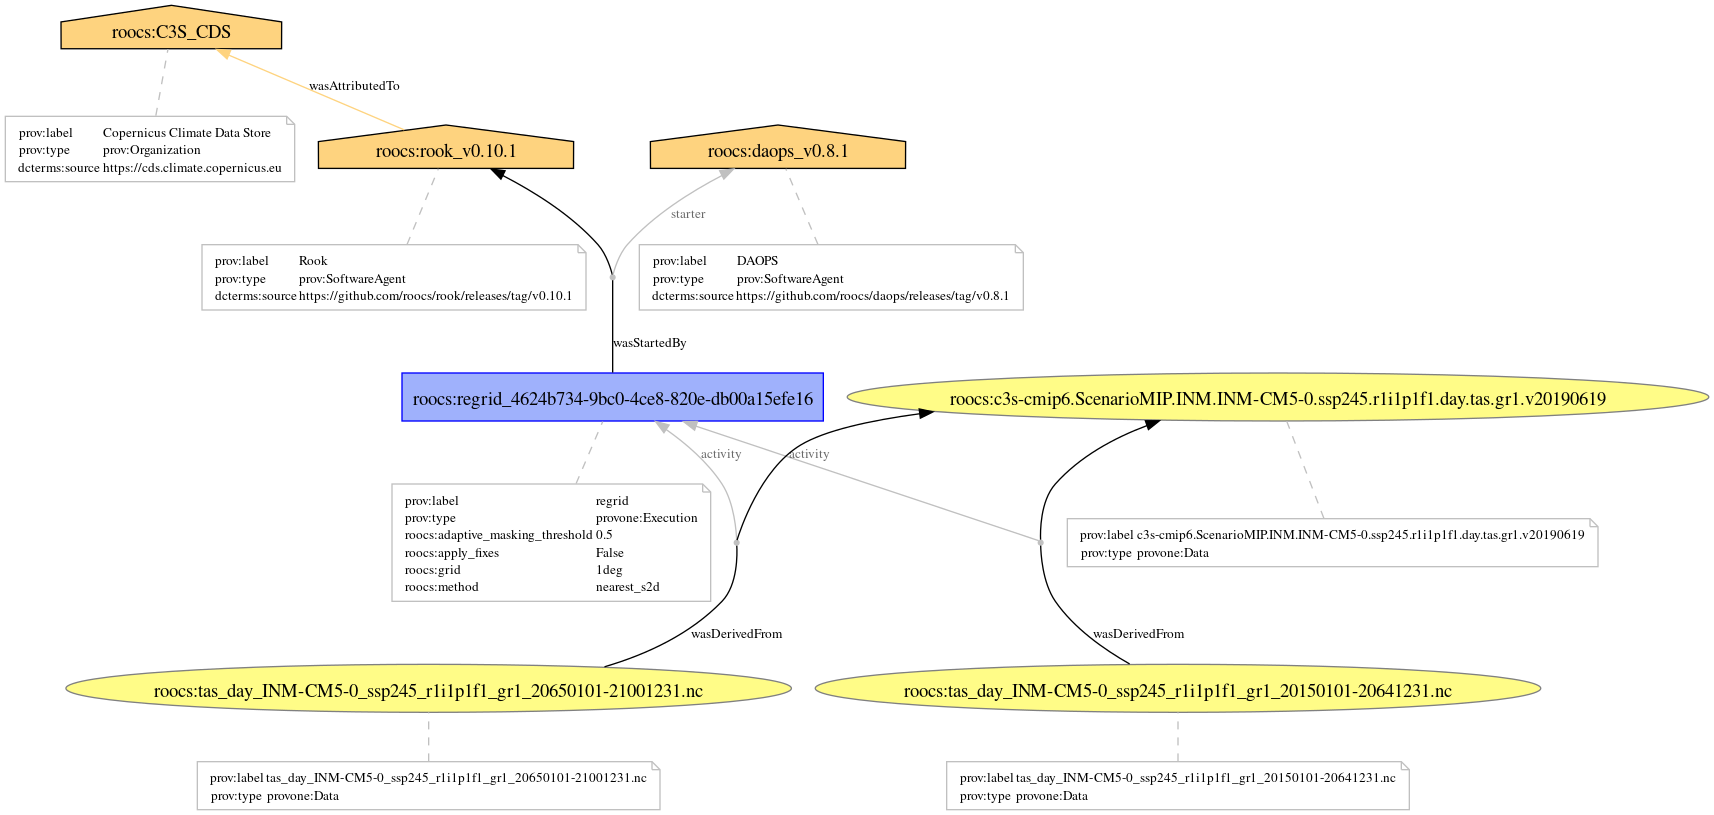

In [5]:
from IPython.display import Image
Image(resp.provenance_image())

## workflow: subset + regrid


In [6]:
from rooki import operators as ops

In [7]:
tas = ops.Input(
    'tas', ['c3s-cmip6.ScenarioMIP.INM.INM-CM5-0.ssp245.r1i1p1f1.day.tas.gr1.v20190619']
)

wf = ops.Subset(tas, time="2016/2016")

wf = ops.Regrid(wf, method="nearest_s2d", grid="1deg")

In [8]:
resp = wf.orchestrate()
resp.ok 

True

In [9]:
resp.status

'ProcessSucceeded'

In [10]:
ds = resp.datasets()[0]
ds

<xarray.Dataset>
Dimensions:    (time: 365, bnds: 2)
Coordinates:
  * time       (time) object 2016-01-01 12:00:00 ... 2016-12-31 12:00:00
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    lat_bnds   (bnds) float64 ...
    lon_bnds   (bnds) float64 ...
    tas        (time) float32 ...
    time_bnds  (time, bnds) object ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    branch_time_in_parent:  60225.0
    contact:                Evgeny Volodin (volodinev@gmail.com)
    ...                     ...
    title:                  INM-CM5-0 output prepared for CMIP6
    tracking_id:            hdl:21.14100/89cab4a2-c867-4bb5-a215-622f969cd844
    variable_id:            tas
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by Lawrence Livermore P...
    cmor_version:           3.4.0

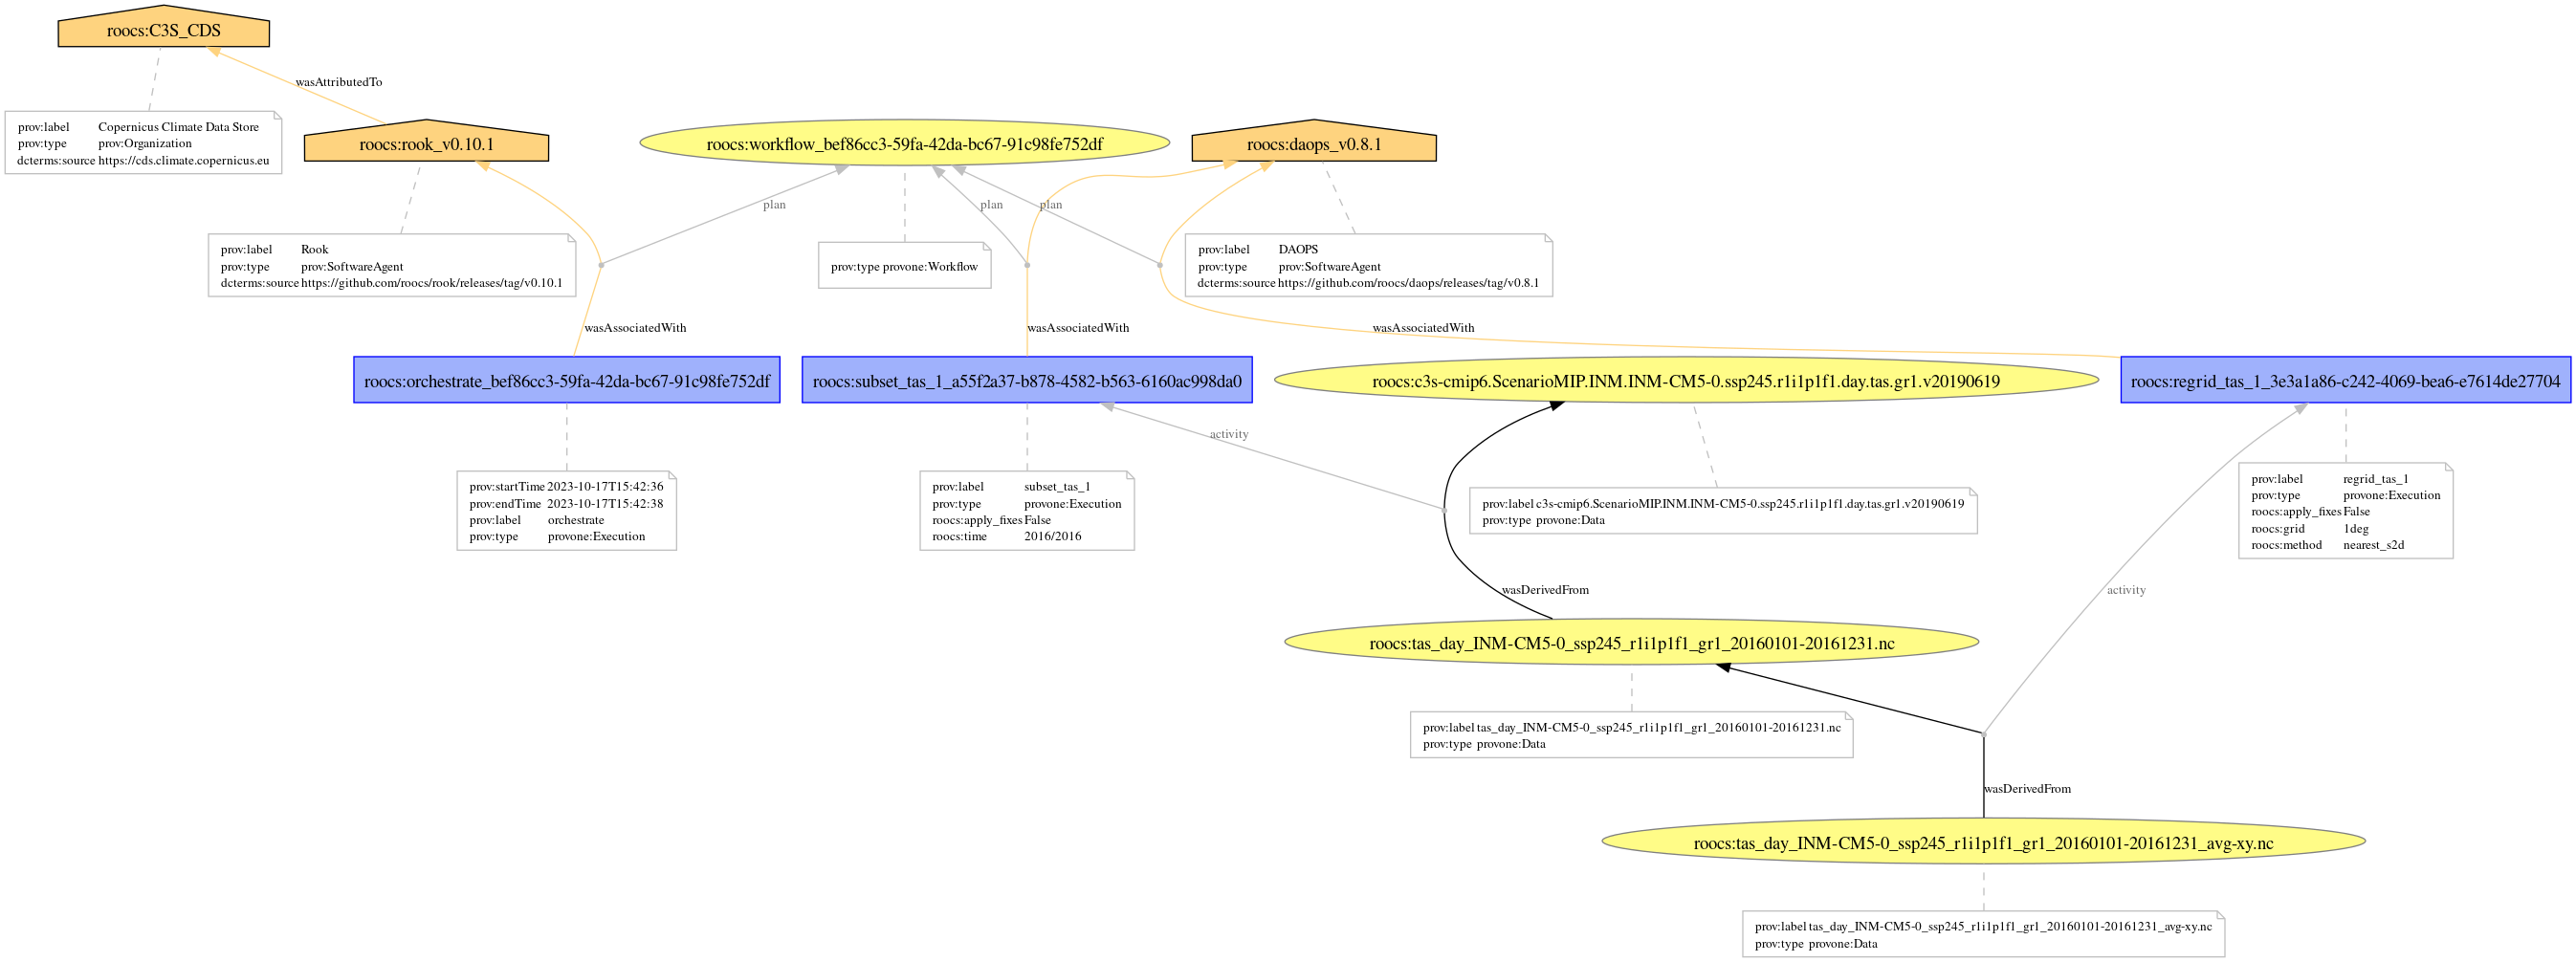

In [11]:
from IPython.display import Image
Image(resp.provenance_image())